# 📊 Students' Social Media Addiction Analysis

This notebook shows an analysis of social media usage by students.
We look at age, gender, sleep, mental health, and academic performance.
The goal is to understand if high social media use is a problem.

📂 **Dataset source**: [Kaggle - Students' Social Media Addiction](https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships)

🌍 Students are from different countries and are 16–25 years old.

---

### What questions will we answer?

To make our analysis clear, we will try to answer these questions:

1.  Is there a link between time spent on social media and how addicted students feel? (Are students who spend more time on social media more addicted?)
2.  How does social media addiction affect sleep and mental health? (Do more addicted students sleep less or have worse mental health?)
3.  Is there a difference in social media addiction between male and female students?
4.  Does social media addiction affect academic performance?
5.  What are the main factors related to social media addiction?

---

Author: *Shahin Surkhayev*  
Date: *April 2025*

## 🎯 Executive Summary
This project conducts an in-depth **Exploratory Data Analysis (EDA)** on social media usage and addiction among students. The primary goal is to understand the prevalence of social media addiction, its key influencing factors, and its potential impact on various aspects of student life, including academic performance, mental health, and sleep patterns.

### Key EDA Findings:
* The dataset primarily consists of **young adults, aged 19 to 22**, with a median age of 21. This indicates a focused demographic for the study.
* Students in this dataset spend a **substantial amount of time on social media daily, with a median of almost 5 hours**. Extended engagement is common.
* **Social media addiction is a prevalent issue**, with a median `Addicted_Score` of 7 out of 10. This suggests a moderate to high level of addiction among a significant portion of students.
* The majority of students report a **moderately healthy mental state** (median `Mental_Health_Score` of 6), but there is room for improvement, potentially influenced by social media habits.
* Social media is identified as a **source of conflicts for a significant portion of students**, with a median conflict score of 3, indicating occasional disagreements related to social media use.
* Most individuals report getting a **healthy amount of sleep (6-8 hours per night)**, with a median of about 6.9 hours, and no extreme sleep patterns are observed.
* The dataset is **well-balanced by gender**, with an almost equal number of male and female students.
* Most students are from **universities (Undergraduate and Graduate levels)**, with a much smaller number of High School students.
* The data comes from a **large number of countries (110 unique)**, but is very imbalanced, with most students from a few top countries. This means conclusions about individual countries should be made carefully.
* **Instagram is the most popular social media platform** among students, followed by TikTok and Facebook. This distribution might influence addiction levels.
* A **large majority of students (about 64%) believe social media affects their academic performance**, highlighting a significant concern.
* The largest group of students are **Single**, followed by those **In Relationship**, with a small group reporting their status as `Complicated`.
* **Very strong positive correlations** exist between:
    * `Addicted_Score` and `Avg_Daily_Usage_Hours` (0.82), confirming that more time spent on social media is strongly linked to higher addiction levels.
    * `Addicted_Score` and `Conflicts_Over_Social_Media` (0.93), indicating that higher addiction is strongly associated with more conflicts related to social media.
* **Extremely strong negative correlations** were found between:
    * `Addicted_Score` and `Mental_Health_Score` (-0.95), suggesting that higher social media addiction is strongly linked to worse mental health.
    * `Avg_Daily_Usage_Hours` and `Mental_Health_Score` (-0.80), implying more time online is strongly linked to worse mental health.
* **Strong negative correlation** between `Addicted_Score` and `Sleep_Hours_Per_Night` (-0.76), indicating that higher addiction levels are associated with fewer hours of sleep.
* **Age shows weak correlations** with all other variables, suggesting it is not a strong linear predictor of social media usage, addiction, or related factors in this dataset.
* **Academic Level significantly impacts addiction levels**: High School students show **much higher median `Addicted_Score` values** (typically 8-9) compared to university students, indicating greater vulnerability to social media addiction in this age group.
* The **Most Used Platform is strongly linked to `Addicted_Score`**: Platforms like **Instagram, TikTok, WhatsApp, and Snapchat are associated with higher addiction scores**, while professional platforms like LinkedIn are linked to lower scores. This highlights the importance of platform choice.
* There is a **very clear and strong difference in `Addicted_Score` based on perceived academic impact**: Students who believe social media **negatively affects their academic performance have significantly higher addiction scores** than those who do not. This directly answers a key project question.
* **Relationship Status shows minor differences in `Addicted_Score`**: Students who are `Single` or have a `Complicated` status show slightly higher median addiction scores compared to those `In Relationship`, suggesting a minor role.
* **Gender does not significantly influence the perception of academic impact**: Both male and female students show very similar proportions (around 64-65%) reporting that social media affects their academic performance.
* **Academic Level is a very strong determinant of perceived academic impact**: An overwhelming **94% of High School students** report that social media affects their academic performance, significantly higher than university students, reinforcing their vulnerability.
* The **Most Used Platform strongly correlates with perceived academic impact**: Platforms like **TikTok (94% Yes), Snapchat (93% Yes), Instagram (69% Yes), and notably WhatsApp (100% Yes)** are associated with a very high perceived negative impact on studies. Conversely, platforms like Facebook, Twitter, and YouTube show a lower perceived impact.
* **Relationship Status shows some association with perceived academic impact**: Students `In Relationship` are less likely to report a negative academic impact compared to `Single` or `Complicated` students.

## 1. Data Loading, Cleaning and Preparation

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for better plots
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [6]:
# Load the dataset
df = pd.read_csv('../data/students_social_media_addiction.csv')

### 1.1. Initial Data Overview

First, let's look at the first few rows of our data. This helps us understand what columns we have and what kind of data they contain.

In [10]:
# Show the first 10 rows
df.head(10)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
5,6,19,Female,Undergraduate,Australia,7.2,Instagram,Yes,4.5,4,Complicated,5,9
6,7,23,Male,Graduate,Germany,1.5,LinkedIn,No,8.0,9,Single,0,2
7,8,20,Female,Undergraduate,Brazil,5.8,Snapchat,Yes,6.0,6,In Relationship,2,8
8,9,18,Male,High School,Japan,4.0,TikTok,No,6.5,7,Single,1,5
9,10,21,Female,Graduate,South Korea,3.3,Instagram,No,7.0,7,In Relationship,1,4


Next, we check the data types and if there are any missing values. This step is very important for data cleaning.

In [13]:
# Get information about the dataset (data types, non-null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

Finally, we look at the basic statistics for numerical columns. This shows us things like average, min, max values, and how data is spread.

In [16]:
# Get descriptive statistics for numerical columns
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


### 1.2. Data Cleaning and Preprocessing

In this section, we will prepare our data for analysis. Data cleaning is a very important step to make sure our results are correct and reliable.

#### 1.2.1. Checking for Missing Values

First, we check if there are any missing values in our dataset. Missing values can cause problems in analysis, so we need to know about them.

In [19]:
# Check for missing values
print("Checking for missing values:")
print(df.isnull().sum())

Checking for missing values:
Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64


As we can see, there are **no missing values** in our dataset. This means we do not need to fill or remove any data points because of missing information. This makes our data cleaning easier!

#### 1.2.2. Handling Outliers

Now, let's handle **outliers**. Outliers are data points that are very different from most other data points. They can make our analysis results incorrect or misleading.

We will use the **Interquartile Range (IQR) method** to find outliers. This method is good because it finds values that are far from the middle 50% of the data.
For any value that is an outlier, we will **replace it with the median value** of that column. The median is a good choice for replacement because it is not affected much by extreme values (unlike the mean/average).

In [23]:
# List of numerical columns for outlier detection
# We exclude 'Student_ID' as it's an identifier, not a measurement.
numeric_columns_for_outliers = [
    'Age',
    'Avg_Daily_Usage_Hours',
    'Sleep_Hours_Per_Night',
    'Mental_Health_Score',
    'Conflicts_Over_Social_Media',
    'Addicted_Score'
]

print("Handling outliers...")

for col in numeric_columns_for_outliers:
    # Check if the column exists in the DataFrame to prevent errors
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

        if outliers_count > 0:
            median_value = df[col].median()
            # Replace outliers with the median value
            df[col] = np.where(df[col] < lower_bound, median_value, df[col])
            df[col] = np.where(df[col] > upper_bound, median_value, df[col])
            print(f"  - Found and replaced {outliers_count} outliers in '{col}' with median ({median_value:.2f}).")
        else:
            print(f"  - No significant outliers found in '{col}'.")
    else:
        print(f"  - Warning: Column '{col}' not found in the dataset. Skipping outlier handling for this column.")


print("\nOutlier handling complete.")

Handling outliers...
  - No significant outliers found in 'Age'.
  - Found and replaced 3 outliers in 'Avg_Daily_Usage_Hours' with median (4.80).
  - No significant outliers found in 'Sleep_Hours_Per_Night'.
  - No significant outliers found in 'Mental_Health_Score'.
  - No significant outliers found in 'Conflicts_Over_Social_Media'.
  - No significant outliers found in 'Addicted_Score'.

Outlier handling complete.


## 2. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a very important step. Here, we will use visualizations and statistics to understand our data better. We will look at distributions of variables, find relationships between them, and start to answer our main questions.

### 2.1. Distributions of Numerical Variables

Let's look at the distribution of our numerical data. Histograms show how often each value appears, and boxplots show us the range, median, and any remaining potential outliers (even after our treatment, some mild ones might still show, but they will be much less extreme).

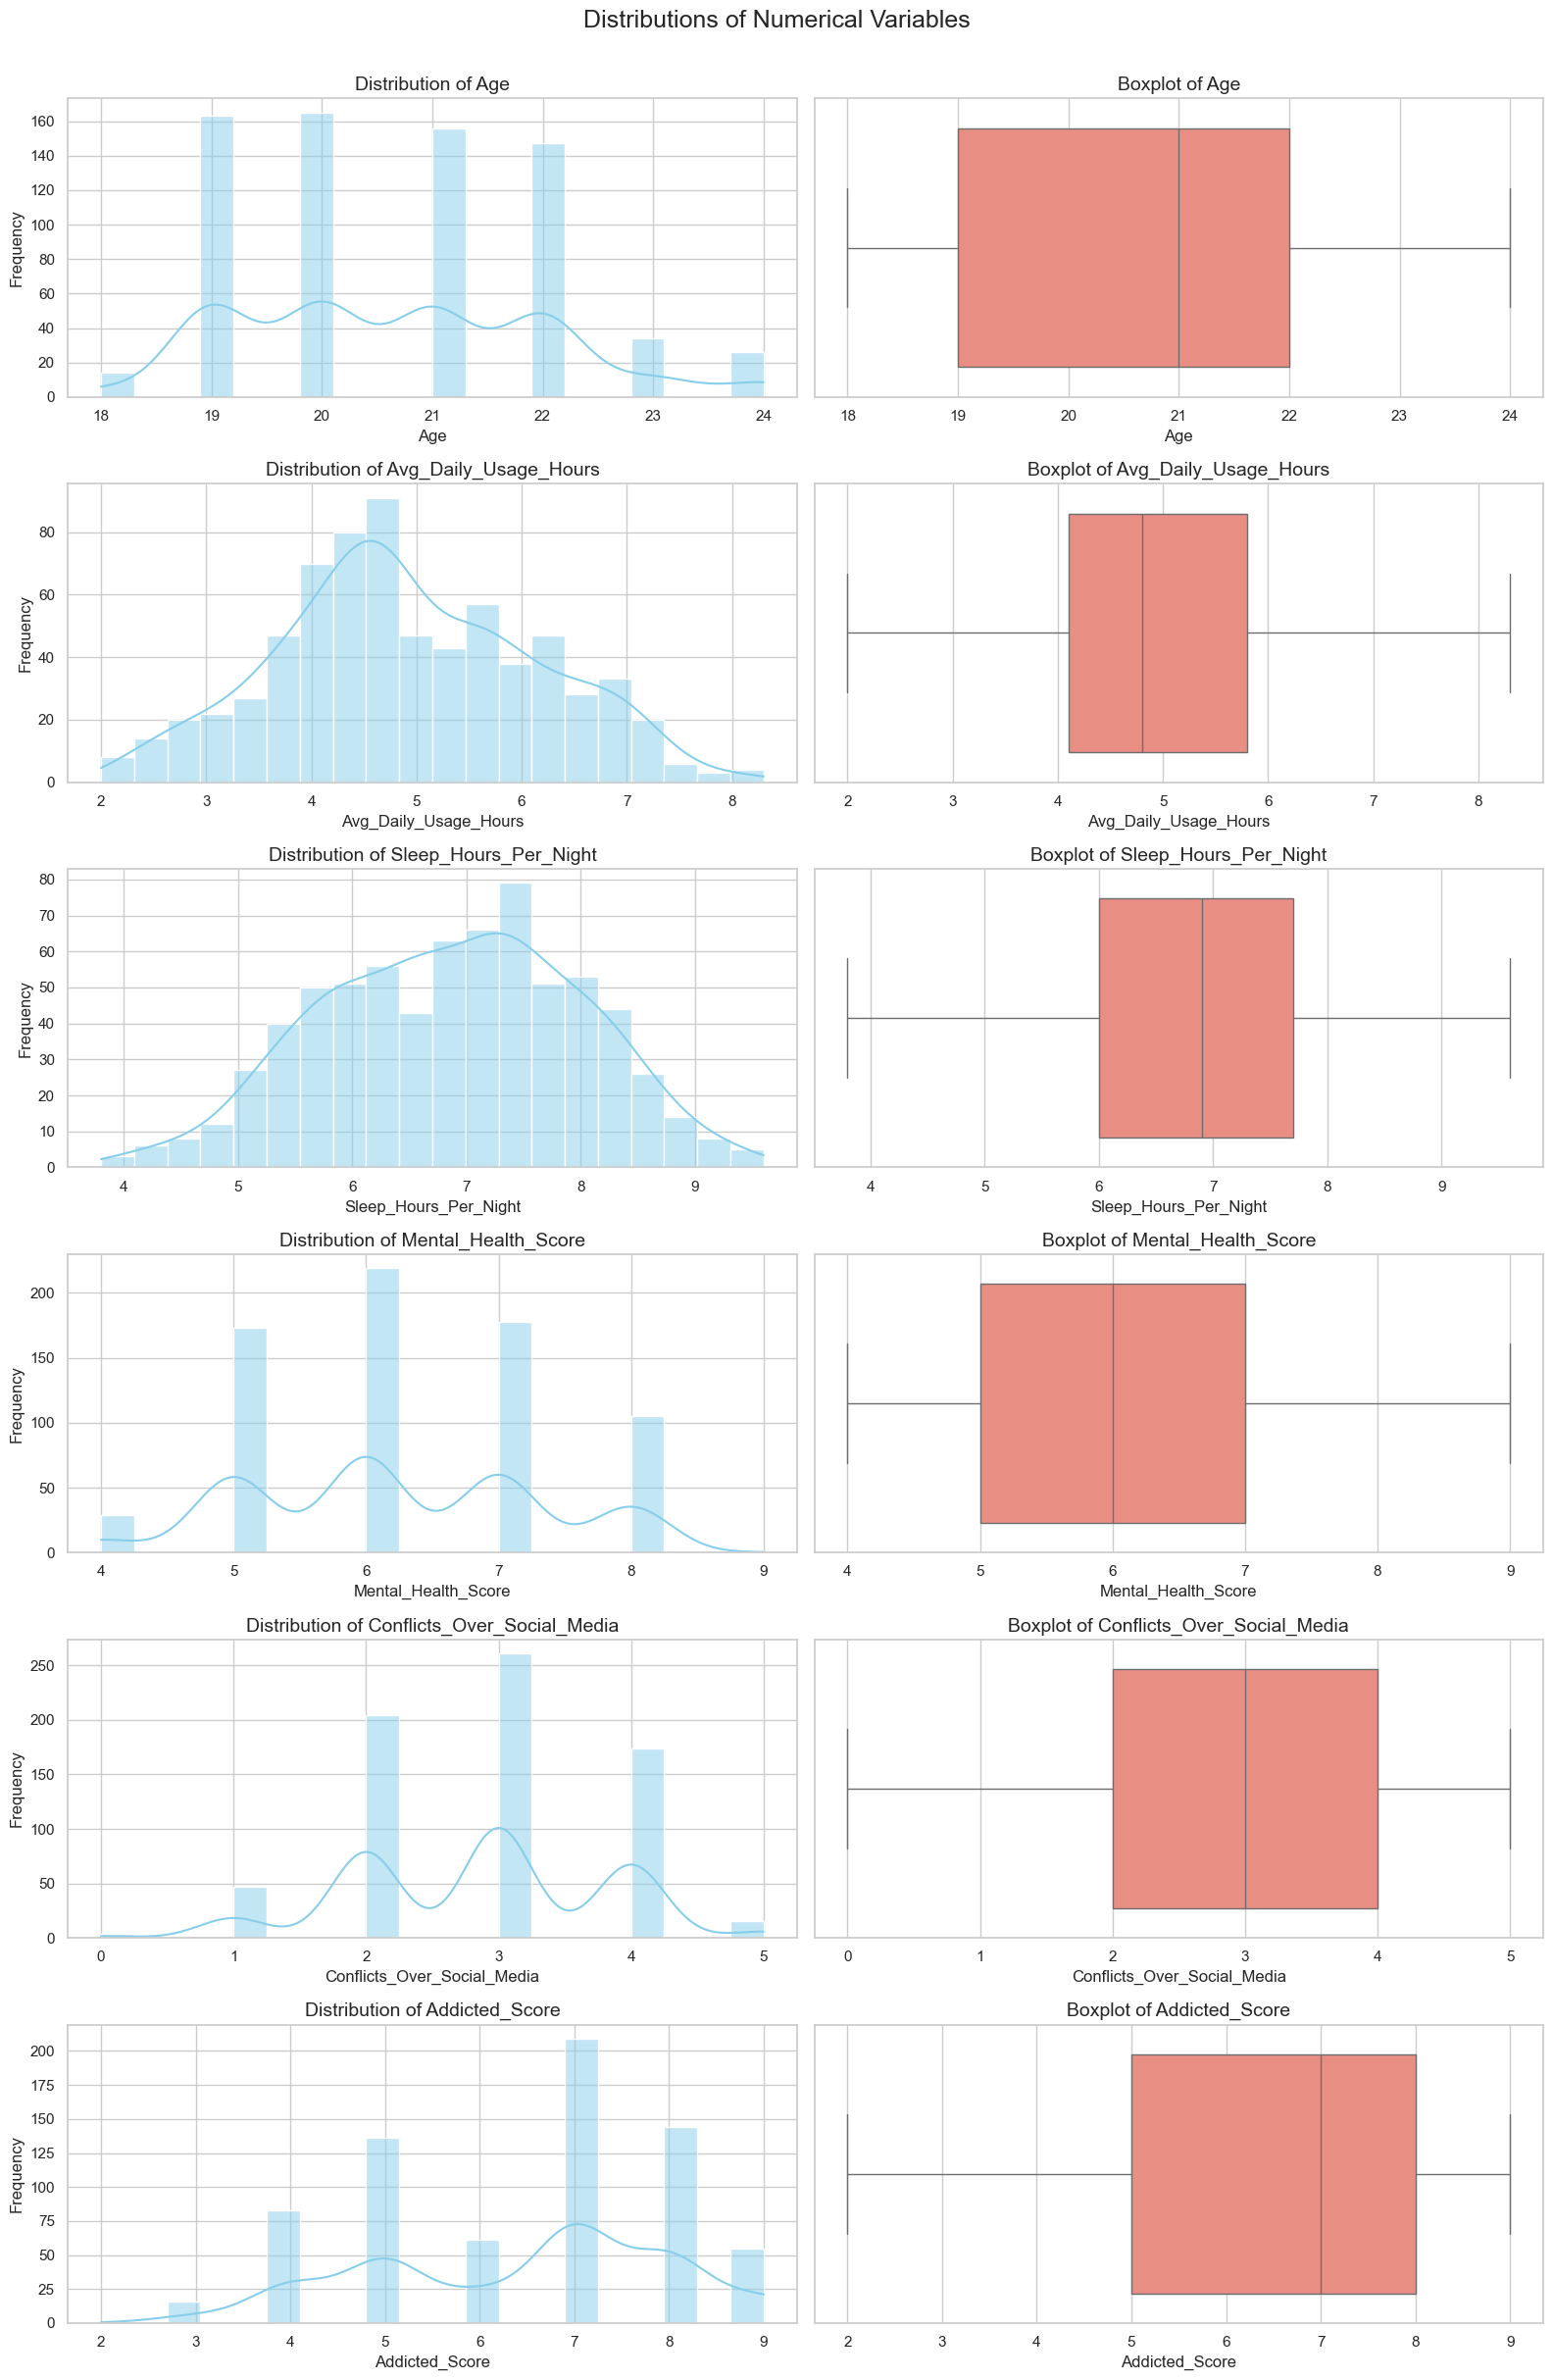

In [27]:
# List of numerical columns for plotting distributions
numeric_columns_for_eda = [
    'Age',
    'Avg_Daily_Usage_Hours',
    'Sleep_Hours_Per_Night',
    'Mental_Health_Score',
    'Conflicts_Over_Social_Media',
    'Addicted_Score'
]

# Set overall style for plots
sns.set(style="whitegrid")
plt.figure(figsize=(16, 25)) # Increased height to accommodate all plots clearly

# Plot histograms and boxplots for each numerical variable
for i, col in enumerate(numeric_columns_for_eda):
    if col in df.columns: # Check if column exists, good practice
        # Histogram
        plt.subplot(len(numeric_columns_for_eda), 2, 2*i + 1)
        sns.histplot(data=df, x=col, kde=True, color='skyblue', bins=20) # Added bins for better resolution
        plt.title(f'Distribution of {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)

        # Boxplot
        plt.subplot(len(numeric_columns_for_eda), 2, 2*i + 2)
        sns.boxplot(data=df, x=col, color='salmon')
        plt.title(f'Boxplot of {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
    else:
        print(f"Warning: Column '{col}' not found for plotting.")

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent titles from overlapping
plt.suptitle('Distributions of Numerical Variables', fontsize=18, y=1.0) # Overall title
plt.show()

### 2.2. Interpretation of Numerical Variable Distributions

After plotting the distributions, we can understand each numerical variable better.

**1. Age:**
* **Histogram (Distribution of Age):** This graph shows that most of the individuals in our dataset are concentrated around the ages of **19 to 22 years old**. We can see a clear peak in this range, with fewer individuals being 18, 23, or 24 years old. This indicates that our data mainly represents young adults.

* **Boxplot (Boxplot of Age):** This plot supports the histogram's findings. The central box shows that the **middle 50% of our data is between 19 and 22 years old**. The **median age is 21**. The 'whiskers' extend from 18 to 24, covering the range of most ages in our dataset. Importantly, **there are no visible outliers**, meaning all ages fall within an expected and reasonable range for our data.

* **In summary:** Both charts confirm that the **dataset primarily consists of young adults, with a majority falling between 19 and 22 years old and a median age of 21**. The absence of outliers suggests a focused demographic. This demographic understanding is crucial for tailoring any recommendations or further analysis, as social media usage patterns and their impacts can vary significantly across different age groups.

---

**2. Avg_Daily_Usage_Hours:**
* **Histogram (Distribution of Avg_Daily_Usage_Hours):** This graph shows that the majority of users spend between **4 and 6 hours per day** using social media. There is a clear peak in usage around **4.5 to 5 hours**. While the distribution shows a slight tendency for some users to spend a bit more time, relatively fewer people use it for very short times (e.g., 2-3 hours) or very long times (e.g., 7-8 hours).

* **Boxplot (Boxplot of Avg_Daily_Usage_Hours):** This plot supports the histogram's findings. The central box indicates that the **middle 50% of daily usage hours are between 4.1 and 5.8 hours**. The **median usage time is around 4.75 hours**. The 'whiskers' extend from 2 to 8.4 hours, covering the range of most usage times in our dataset. **There are no visible outliers**, which means all usage hours are within a typical and expected range, without extreme values.

* **In summary:** Both charts confirm that **students in this dataset spend a substantial amount of time on social media daily, with a median of almost 5 hours**. The concentration of usage between 4 and 6 hours suggests that extended social media engagement is common. This variable is crucial for understanding its direct relationship with `Addicted_Score` and other potential impacts, as higher usage time is often a precursor to higher addiction levels and related issues.

---

**3. Sleep_Hours_Per_Night:**
* **Histogram (Distribution of Sleep_Hours_Per_Night):** This graph shows that most individuals in our dataset get between **6 and 8 hours of sleep per night**. There is a clear peak in the distribution around **7 to 7.5 hours**, indicating this is the most common amount of sleep. Fewer individuals report sleeping for very short (less than 5 hours) or very long (more than 9 hours) durations. The distribution generally looks quite balanced, resembling a typical bell curve.

* **Boxplot (Boxplot of Sleep_Hours_Per_Night):** This plot further confirms the sleep patterns. The central box shows that the **middle 50% of sleep durations are between 6 and 7.7 hours**. The **median sleep time is approximately 6.9 hours**. The 'whiskers' extend from about 3.8 to 9.6 hours, indicating the full range of typical sleep durations in our data. Importantly, **no outliers are visible**, meaning all reported sleep hours are within a normal and expected range.

* **In summary:** Both charts indicate that the **majority of individuals in our dataset get a healthy amount of sleep, typically between 6 and 8 hours per night**. The absence of outliers suggests that extreme sleep deprivation or excessive sleep is not a widespread issue in this sample. This variable will be important for exploring any potential inverse relationships with daily social media usage or addiction scores, as disrupted sleep is a known consequence of excessive screen time.

---

**4. Mental_Health_Score:**
* **Histogram (Distribution of Mental_Health_Score):** This graph shows that the majority of students report a `Mental_Health_Score` between **5 and 8**. There's a clear peak around **6**, indicating this is the most common score. The distribution is **left-skewed**, meaning fewer students report very high scores (9-10) and there's a gradual decline towards lower scores (like 4), suggesting that while severe mental health issues are not widespread, top scores are also rare.

* **Boxplot (Boxplot of Mental_Health_Score):** This plot supports the histogram's findings. The central box shows that the **middle 50% of our data is between 5 and 7**. The **median mental health score is 6**. The 'whiskers' extend from 4 to 9, covering the range of almost all scores in our dataset. Importantly, **there are no visible outliers**, which means all scores fall within an expected range and there are no extreme cases reported.

* **In summary:** The data suggests that students, on average, report a **moderately healthy mental state** (median score of 6). While severe issues are rare, there's also a lack of students reporting excellent mental well-being (scores of 9-10 are infrequent). This variable will be crucial for understanding its relationship with social media usage and addiction, as there's room for improvement in mental health, potentially influenced by social media habits.

---

**5. Conflicts_Over_Social_Media:**
* **Histogram (Distribution of Conflicts_Over_Social_Media):** The histogram shows that **most students report experiencing some level of conflict (scores 1-4)**, rather than no conflicts at all (score 0). The distribution is multimodal, with notable peaks at **2 and 3**, indicating these are the most common reported frequencies of conflicts. Very few students report experiencing no conflicts (score 0) or very high levels of conflicts (score 5).

* **Boxplot (Boxplot of Conflicts_Over_Social_Media):** This plot visually confirms the distribution. The central box, representing the **middle 50% of the data, spans from 2 to 4**. The **median number of conflicts is 3**. The 'whiskers' extend from 0 to 5, covering the entire range of reported scores. There are **no visible outliers**, suggesting that all conflict levels observed are within the expected range for this dataset.

* **In summary:** The data indicates that **social media is a source of conflicts for a significant portion of students**, with a median conflict score of 3. This suggests that the majority of students experience at least occasional disagreements or issues related to their social media use. This finding is important as it highlights a potential negative social impact of social media, which could be further investigated in relation to addiction levels or specific platform usage.

---

**6. Addicted_Score:**
* **Histogram (Distribution of Addicted_Score):** The histogram shows a distribution with scores ranging from 2 to 9. While there are some lower scores (around 3), the distribution is **skewed towards higher scores**, with prominent peaks at **5 and especially 7**. This suggests that a significant portion of students in this dataset report a moderate to high level of social media addiction. Few students report very low (score 2) or very high (score 9) addiction levels.

* **Boxplot (Boxplot of Addicted_Score):** This plot supports the histogram's observations. The central box, representing the **middle 50% of the data, spans from 5 to 8**. The **median addiction score is 7**, indicating that a typical student in this sample reports a relatively high level of social media addiction. The 'whiskers' extend from 2 to 9, covering the full range of observed scores. **There are no visible outliers**, meaning all scores fall within the expected range without extreme values.

* **In summary:** The `Addicted_Score` distribution is a central finding for this project. The **median score of 7 (out of 10)**, combined with the concentration of scores between 5 and 8, clearly indicates that **social media addiction is a prevalent issue among the students in this dataset**. This finding highlights the importance of understanding the factors contributing to this addiction and its potential consequences on academic performance and mental well-being. This will be a primary focus for further analysis and recommendations.


### 2.3. Distributions of Categorical Variables

Now, let's explore the distribution of our categorical variables. We will use count plots to see how many students fall into each category (e.g., how many male vs. female students).


Value counts for 'Gender':
Gender
Female    353
Male      352
Name: count, dtype: int64


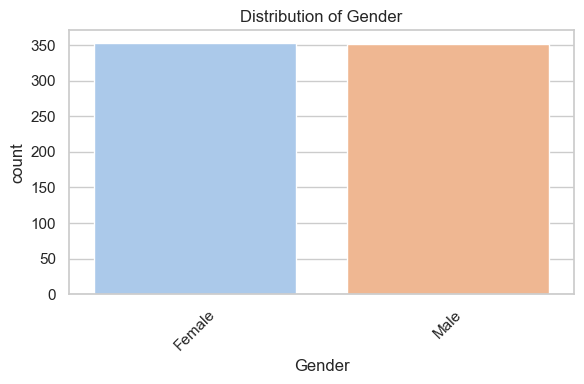


Value counts for 'Academic_Level':
Academic_Level
Undergraduate    353
Graduate         325
High School       27
Name: count, dtype: int64


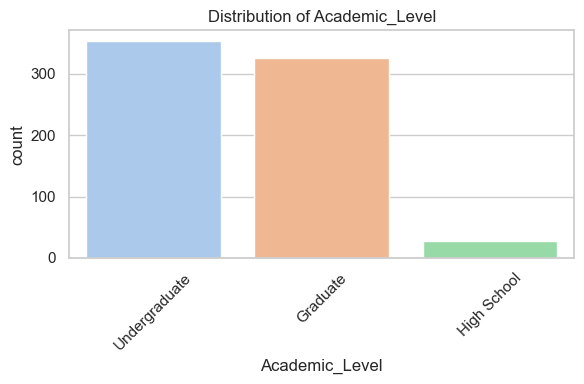


Value counts for 'Country':
Country
India        53
USA          40
Canada       34
Denmark      27
Ireland      27
             ..
Uruguay       1
Ecuador       1
Venezuela     1
Peru          1
Jamaica       1
Name: count, Length: 110, dtype: int64


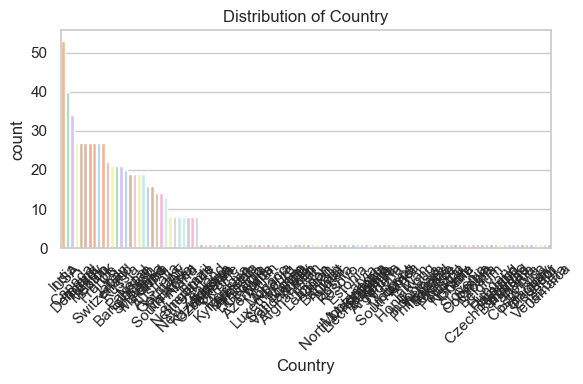


Value counts for 'Most_Used_Platform':
Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
LINE          12
KakaoTalk     12
VKontakte     12
YouTube       10
Name: count, dtype: int64


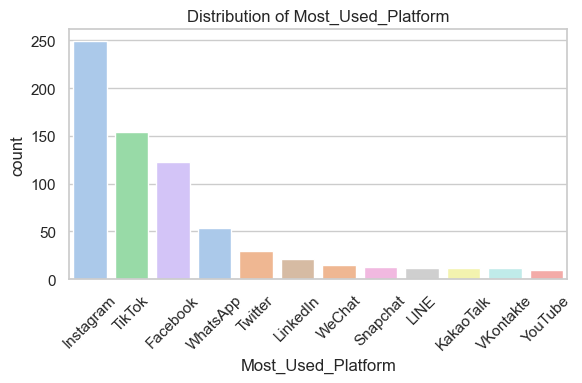


Value counts for 'Affects_Academic_Performance':
Affects_Academic_Performance
Yes    453
No     252
Name: count, dtype: int64


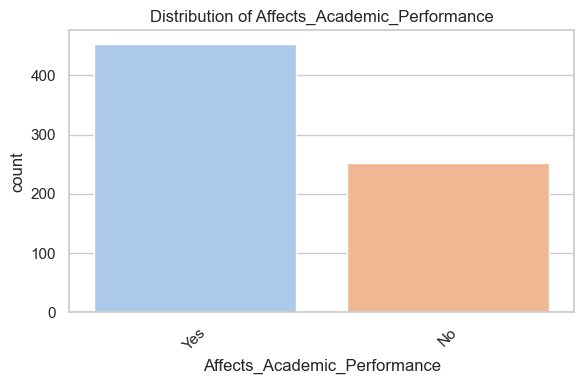


Value counts for 'Relationship_Status':
Relationship_Status
Single             384
In Relationship    289
Complicated         32
Name: count, dtype: int64


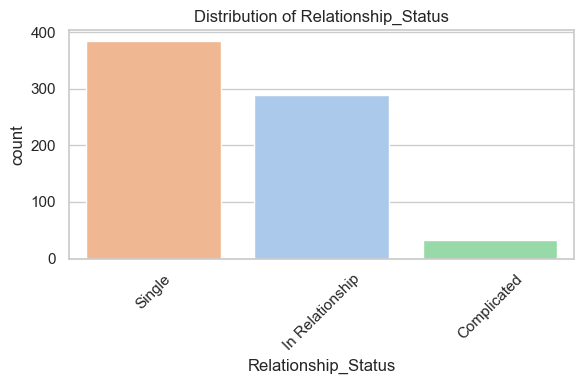

In [31]:
# List of main categorical columns
categorical_columns = [
    'Gender', 
    'Academic_Level', 
    'Country', 
    'Most_Used_Platform', 
    'Affects_Academic_Performance', 
    'Relationship_Status'
]

# Loop through columns and show value counts + bar plot
for column in categorical_columns:
    print(f"\nValue counts for '{column}':")
    print(df[column].value_counts())

    # Bar plot
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=column, hue=column, order=df[column].value_counts().index, palette="pastel", legend=False)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 2.4. Interpretation of Categorical Variable Distributions

Let's interpret what we see from the count plots for our categorical variables:

**1. Gender:**
* The `Gender` plot shows that the number of **Female** students (353) and **Male** students (352) in our dataset is almost exactly the same.
* This means our dataset is **well-balanced** in terms of gender. This is good for our analysis because it ensures that neither gender group is overrepresented, allowing for fair comparisons in later steps.

**2. Academic_Level:**
* The `Academic_Level` plot shows that most students in our dataset are from **universities**.
* **Undergraduate** students (353) and **Graduate** students (325) are almost equally represented. This means we have a good mix of students from different levels of higher education.
* There are **much fewer High School** students (27). This suggests that our analysis will be mostly relevant to university students, as they form the biggest part of our data.

**3. Country:**
* The `Country` plot (and `value_counts`) shows that our dataset includes students from a **very large number of different countries (110 unique countries)**.
* However, the data is **very imbalanced by country**. Most students come from just a few countries (like India with 53, USA with 40, and Canada with 34).
* Many countries have a very small number of students (sometimes only 1 or 2). This means we **cannot make strong conclusions about individual countries** (especially those with little data). Our analysis will show general trends across all students or trends in the most represented countries.

**4. Most_Used_Platform:**
* The `Most_Used_Platform` plot clearly shows that **Instagram is the most popular social media platform** among students in this dataset (249 users), significantly more than others.
* **TikTok (154 users) and Facebook (123 users)** are also very popular, taking second and third places.
* **WhatsApp (54 users)** is next, but with much fewer users than the top 3.
* Many other platforms (like Twitter, LinkedIn, WeChat, Snapchat, LINE, KakaoTalk, VKontakte, YouTube) have **much smaller numbers of users**. This indicates they are less common among these students.
* This distribution is important because the most used platform might influence the type of social media interaction and potentially the level of addiction.

**5. Affects_Academic_Performance:**
* The `Affects_Academic_Performance` plot shows that a **large majority of students (453 out of 705) believe that social media use affects their academic performance**.
* A smaller group of students (252) believe it does not.
* This is an important finding, suggesting that for many students in our dataset, social media has an impact on their studies.

**6. Relationship_Status:**
* The `Relationship_Status` plot shows that the largest group of students are **Single (384 students)**.
* A significant number of students are **In Relationship (289 students)**.
* A much smaller group of students reported their status as **Complicated (32 students)**.
* This distribution is useful for understanding the demographic makeup of our student sample, and might be explored later for its relationship with social media usage or addiction.

### 2.5. Correlation Analysis of Numerical Variables

To understand how numerical variables relate to each other, we will use a **correlation matrix** and visualize it with a **heatmap**.
A correlation value tells us how strong the relationship is between two variables:
* Close to `+1`: Strong positive relationship (as one goes up, the other also goes up).
* Close to `-1`: Strong negative relationship (as one goes up, the other goes down).
* Close to `0`: No or very weak relationship.

We are especially interested in how other variables relate to our `Addicted_Score`.

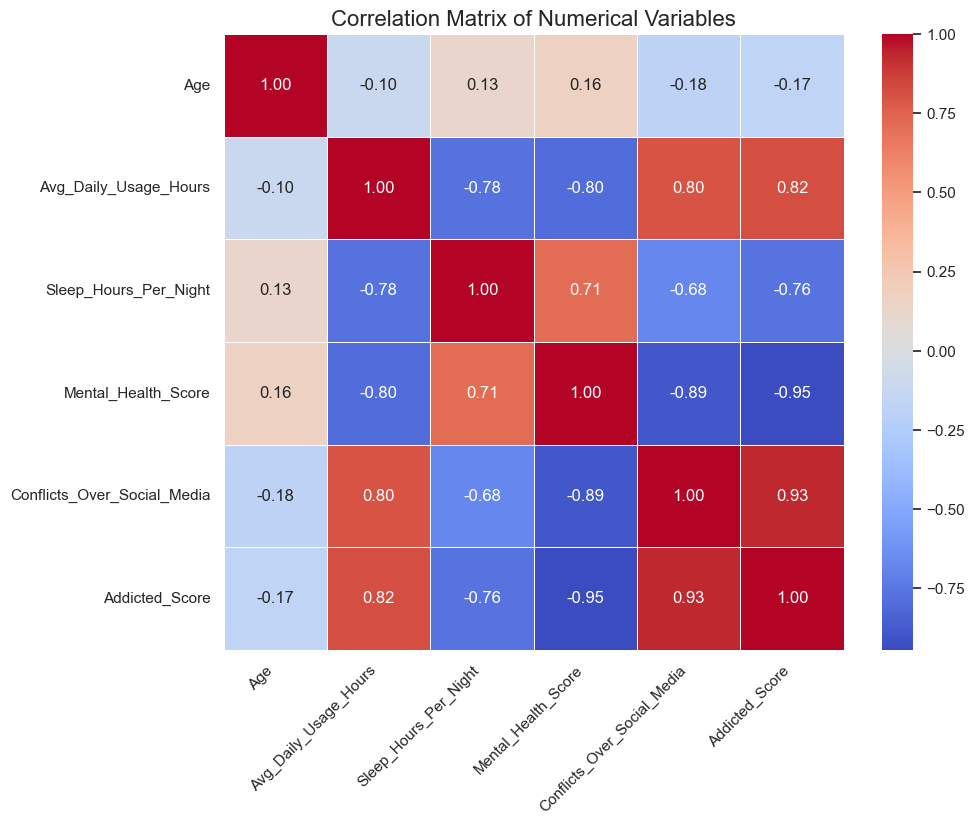

In [35]:
# List of numerical columns for correlation analysis
# Exclude 'Student_ID' as it is just an identifier
numerical_cols_for_correlation = [
    'Age',
    'Avg_Daily_Usage_Hours',
    'Sleep_Hours_Per_Night',
    'Mental_Health_Score',
    'Conflicts_Over_Social_Media',
    'Addicted_Score'
]

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols_for_correlation].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,     # Show the correlation values on the heatmap
    cmap='coolwarm', # Color map: 'coolwarm' shows positive (warm) and negative (cool) correlations
    fmt=".2f",      # Format annotation values to two decimal places
    linewidths=.5   # Add lines between cells for better readability
)
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
plt.yticks(rotation=0)              # Keep y-axis labels horizontal
plt.show()

### 2.6. Interpretation of Correlation Matrix of Numerical Variables

Looking at the heatmap and the correlation values, we can understand the relationships between our numerical variables:

**General Observations:**

* **Positive correlations (values close to +1)** mean that when one variable increases, the other also tends to increase.
* **Negative correlations (values close to -1)** mean that when one variable increases, the other tends to decrease.
* **Correlations close to 0** mean there is a very weak or no linear relationship.

**Key Relationships with Addicted_Score:**

Our main interest is to see what factors are most related to `Addicted_Score`.

1.  **`Addicted_Score` and `Mental_Health_Score` (Correlation: -0.95):**
    * This is an **extremely strong negative correlation**.
    * **Interpretation:** It means that as a student's `Addicted_Score` (addiction level) goes **up**, their `Mental_Health_Score` (mental health) tends to go **down** significantly. This strongly suggests that higher social media addiction is linked to worse mental health. This answers one of our main questions.

2.  **`Addicted_Score` and `Conflicts_Over_Social_Media` (Correlation: 0.93):**
    * This is an **extremely strong positive correlation**.
    * **Interpretation:** As a student's `Addicted_Score` goes **up**, the number of `Conflicts_Over_Social_Media` they experience also tends to go **up** significantly. This suggests that students who are more addicted to social media also tend to have more conflicts related to it.

3.  **`Addicted_Score` and `Avg_Daily_Usage_Hours` (Correlation: 0.82):**
    * This is a **very strong positive correlation**.
    * **Interpretation:** As the `Avg_Daily_Usage_Hours` (time spent on social media) increases, the `Addicted_Score` also tends to **increase**. This strongly supports the idea that more time spent on social media is linked to higher levels of addiction. This directly answers our first question.

4.  **`Addicted_Score` and `Sleep_Hours_Per_Night` (Correlation: -0.76):**
    * This is a **strong negative correlation**.
    * **Interpretation:** As `Addicted_Score` goes **up**, the `Sleep_Hours_Per_Night` tends to go **down**. This means that students with higher social media addiction levels often report sleeping fewer hours. This helps answer our question about the effect on sleep.

**Other Notable Relationships:**

* **`Mental_Health_Score` and `Conflicts_Over_Social_Media` (Correlation: -0.89):** Very strong negative correlation. More conflicts are strongly linked to worse mental health.
* **`Avg_Daily_Usage_Hours` and `Mental_Health_Score` (Correlation: -0.80):** Very strong negative correlation. More time online is strongly linked to worse mental health.
* **`Avg_Daily_Usage_Hours` and `Conflicts_Over_Social_Media` (Correlation: 0.80):** Very strong positive correlation. More time online is strongly linked to more conflicts.
* **`Sleep_Hours_Per_Night` and `Mental_Health_Score` (Correlation: 0.71):** Strong positive correlation. More sleep is linked to better mental health.
* **`Sleep_Hours_Per_Night` and `Avg_Daily_Usage_Hours` (Correlation: -0.78):** Strong negative correlation. More time online is linked to less sleep.
* **`Sleep_Hours_Per_Night` and `Conflicts_Over_Social_Media` (Correlation: -0.68):** Moderate to strong negative correlation. More conflicts are linked to less sleep.

**Less Strong Relationships:**

* `Age` shows only **weak correlations** with other variables (e.g., `Age-Avg_Daily_Usage_Hours` is -0.10, `Age-Addicted_Score` is -0.17). This means age is not a strong predictor of social media usage, addiction, or related factors in this dataset.

**In conclusion:** The correlation analysis reveals strong and meaningful relationships between social media addiction, time spent online, conflicts related to social media, sleep, and mental health. Specifically, higher addiction scores are strongly linked to more time online, more conflicts, less sleep, and worse mental health. This directly addresses several of our initial project questions.

### 2.7. Relationships Between Categorical and Numerical Variables

Next, we will explore how our categorical variables relate to our numerical variables, especially to `Addicted_Score`. We will use **boxplots** for this. Boxplots are great for showing the distribution of a numerical value across different categories. They show the median, the spread of the data, and potential outliers for each group.

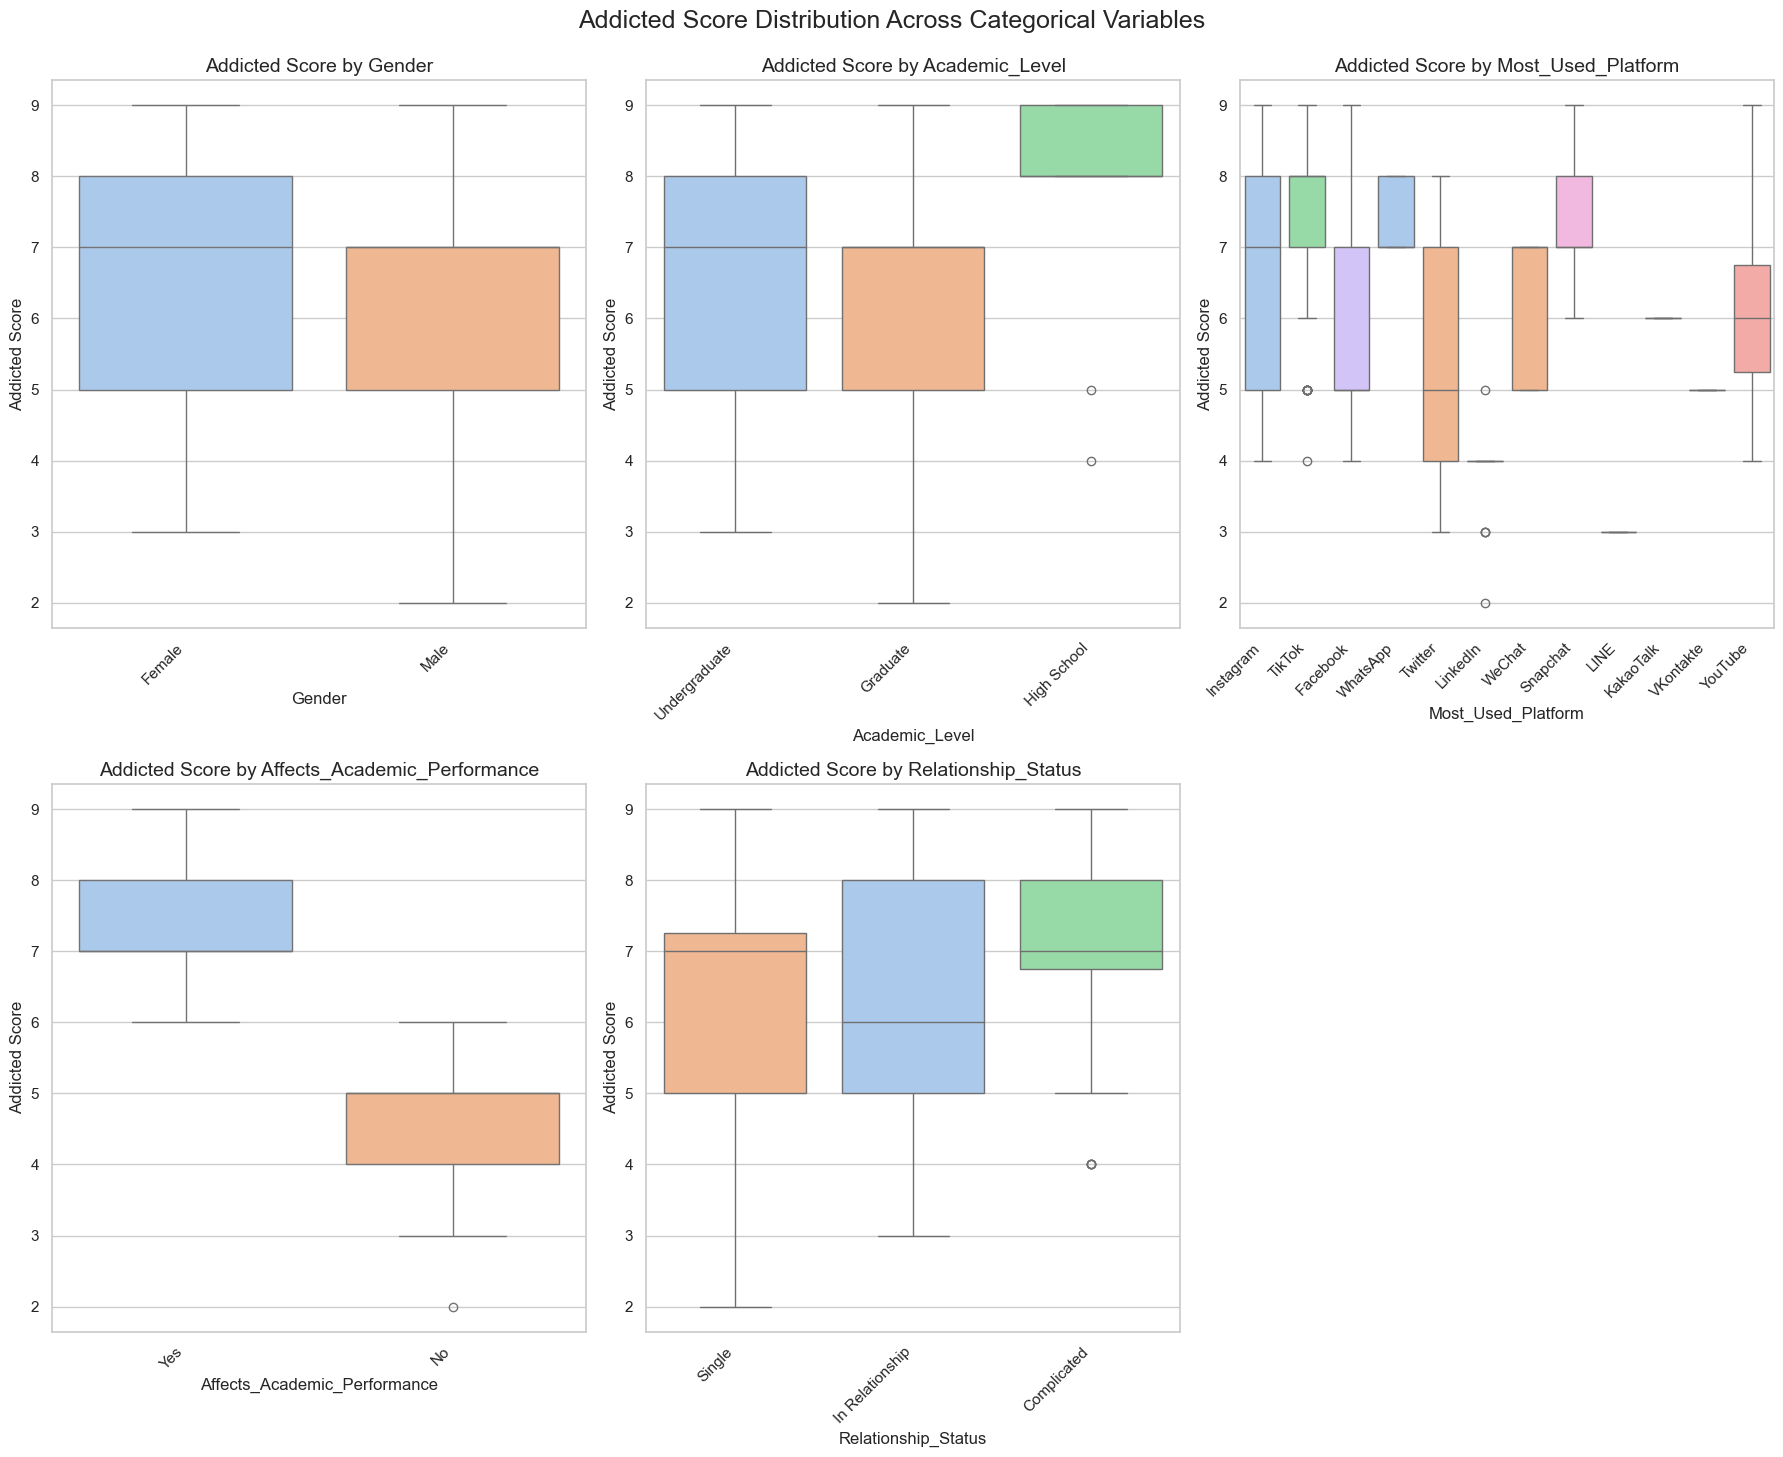

In [39]:
# List of categorical columns to analyze against Addicted_Score
categorical_cols_for_num_rel = [
    'Gender',
    'Academic_Level',
    'Most_Used_Platform', # This is very important to see platform impact
    'Affects_Academic_Performance', # How does this relate to addiction score?
    'Relationship_Status'
    # 'Country' is intentionally excluded from this plot type due to its high cardinality (110 unique values),
    # which would make the boxplot unreadable. Its relationship can be explored through other methods if needed.
]

# Set up the matplotlib figure
plt.figure(figsize=(18, 15)) # Adjust figure size for multiple plots

# Loop through each categorical column and create a boxplot against Addicted_Score
for i, col in enumerate(categorical_cols_for_num_rel):
    if col in df.columns: # Good practice to check if column exists
        plt.subplot(2, 3, i + 1) # Arrange plots in 2 rows, 3 columns
        sns.boxplot(data=df, x=col, hue=col, y='Addicted_Score', palette='pastel', order=df[col].value_counts().index, legend=False)
        plt.title(f'Addicted Score by {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Addicted Score', fontsize=12)
        plt.xticks(rotation=45, ha='right') # Rotate labels for readability
    else:
        print(f"Warning: Categorical column '{col}' not found for plotting.")

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.suptitle('Addicted Score Distribution Across Categorical Variables', fontsize=18, y=1.0)
plt.show()

### 2.8. Interpretation of Relationships: Categorical and Numerical Variables

Now, let's look at how our key numerical variable, `Addicted_Score`, changes across different categories.

**1. Addicted Score by Gender:**
* Both male and female students show a similar upper range in their addiction scores (up to 9).
* However, the **median `Addicted_Score` for female students (7) appears to be slightly higher** than for male students (where the median is not clearly visible but falls within the 5-7 box, suggesting it might be around 5 or 6).
* The "box" (IQR) for females (5-8) is slightly wider and shifted to higher scores compared to males (5-7), indicating that **female students might, on average, report slightly higher `Addicted_Score` values or have a greater spread towards higher scores** within their middle 50%.
* The lower whisker for males (2) is slightly lower than for females (3), suggesting that some male students might report very low addiction scores.

**In summary:** While both genders show a range of addiction scores, there's a slight indication that female students might experience slightly higher median addiction levels or a broader distribution towards higher scores compared to male students. However, the overall ranges are quite similar.

---

**2. Addicted Score by Academic_Level:**
* **Undergraduate and Graduate students** show similar patterns to the Male/Female split, with undergraduates having a slightly wider range towards higher scores (median 7) compared to graduates (median likely 5-6).
* However, the most notable observation is the **High School group**. Despite being a smaller group (as seen in our categorical distribution analysis), their `Addicted_Score` distribution is significantly different:
    * The majority of high school students (their box 8-9) have **much higher `Addicted_Score` values** compared to both undergraduate and graduate students. Their typical addiction scores are already in the higher range (8-9), suggesting a greater tendency towards addiction.
    * The outliers at 4 and 5 for high school students are interesting: they represent a few high schoolers with much *lower* addiction scores than their peers, highlighting individual differences.

**In summary:** There appears to be a clear trend where **High School students, on average, report higher social media addiction scores** than university students (Undergraduate and Graduate). This suggests that academic level, particularly being in high school, might be a significant factor in social media addiction.

---

**3. Addicted Score by Most_Used_Platform:**
* **Platforms with generally higher `Addicted_Score` medians (7-8):** Instagram, TikTok, WhatsApp, Snapchat. These platforms, often characterized by short-form content, visual engagement, and messaging, seem to be associated with higher addiction levels.
* **Platforms with generally moderate `Addicted_Score` medians (5-6):** Facebook, Twitter, WeChat, KakaoTalk, VKontakte, YouTube.
* **Platforms with generally lower `Addicted_Score` medians (3-4):** LinkedIn, LINE. This aligns with their professional or more direct communication focus, which might lead to less addictive usage patterns.
* **Important Note:** For platforms with very few data points (LinkedIn, LINE, KakaoTalk, VKontakte), conclusions should be made with extreme caution, as their distributions are not fully represented by a typical boxplot and might be skewed by individual responses.

**In summary:** The choice of the most used social media platform appears to be strongly linked to the `Addicted_Score`. Platforms like Instagram, TikTok, WhatsApp, and Snapchat are associated with higher addiction scores among students, while professional platforms like LinkedIn are linked to lower scores. This is a crucial finding for understanding the drivers of social media addiction.

---

**4. Addicted Score by Affects_Academic_Performance:**
* There is a **very clear and strong difference** in `Addicted_Score` between these two groups.
* Students who report that social media **negatively impacts their academic performance** (`Yes` group) consistently exhibit **much higher addiction scores**.
* Conversely, students who report **no impact on their academic performance** (`No` group) tend to have **significantly lower addiction scores**.
* This suggests a strong correlation: students who are more addicted to social media are also more likely to perceive that it interferes with their studies. This directly supports one of our key project questions about the impact on academic performance.

**In summary:** The perception of social media affecting academic performance is highly associated with the level of social media addiction. Students who feel their studies are affected tend to have higher addiction scores.

---

**5. Addicted Score by Relationship_Status:**
* Students who are **Single** (median 7) and those with a **Complicated** status (median 7) tend to have slightly higher median `Addicted_Score` compared to students who are **In Relationship** (median 6).
* The overall range of addiction scores (from around 2-3 up to 9) is similar across all relationship statuses.
* While there are some slight differences in medians, the overlap in the boxes and whiskers suggests that relationship status might not be as strong a differentiator for `Addicted_Score` as `Academic_Level` or `Affects_Academic_Performance`. However, it's worth noting the slightly lower median for those in a relationship. The outlier in the 'Complicated' group reminds us of individual variations.

**In summary:** Students who are Single or in a "Complicated" relationship status show slightly higher median social media addiction scores compared to those who are "In Relationship". This could suggest that relationship status plays a minor role in the level of social media addiction, with those in established relationships potentially showing slightly lower addiction.

### 2.9. Relationships Between Categorical Variables

Finally, let's explore relationships between categorical variables themselves. This can help us understand if certain demographic groups or behavioral patterns are associated with other categorical factors. We'll use **cross-tabulations** to count frequencies and potentially **stacked bar charts** for visualization if a relationship seems insightful.

We will primarily focus on how `Affects_Academic_Performance` is distributed across other categorical variables, as this is a key outcome of our study.

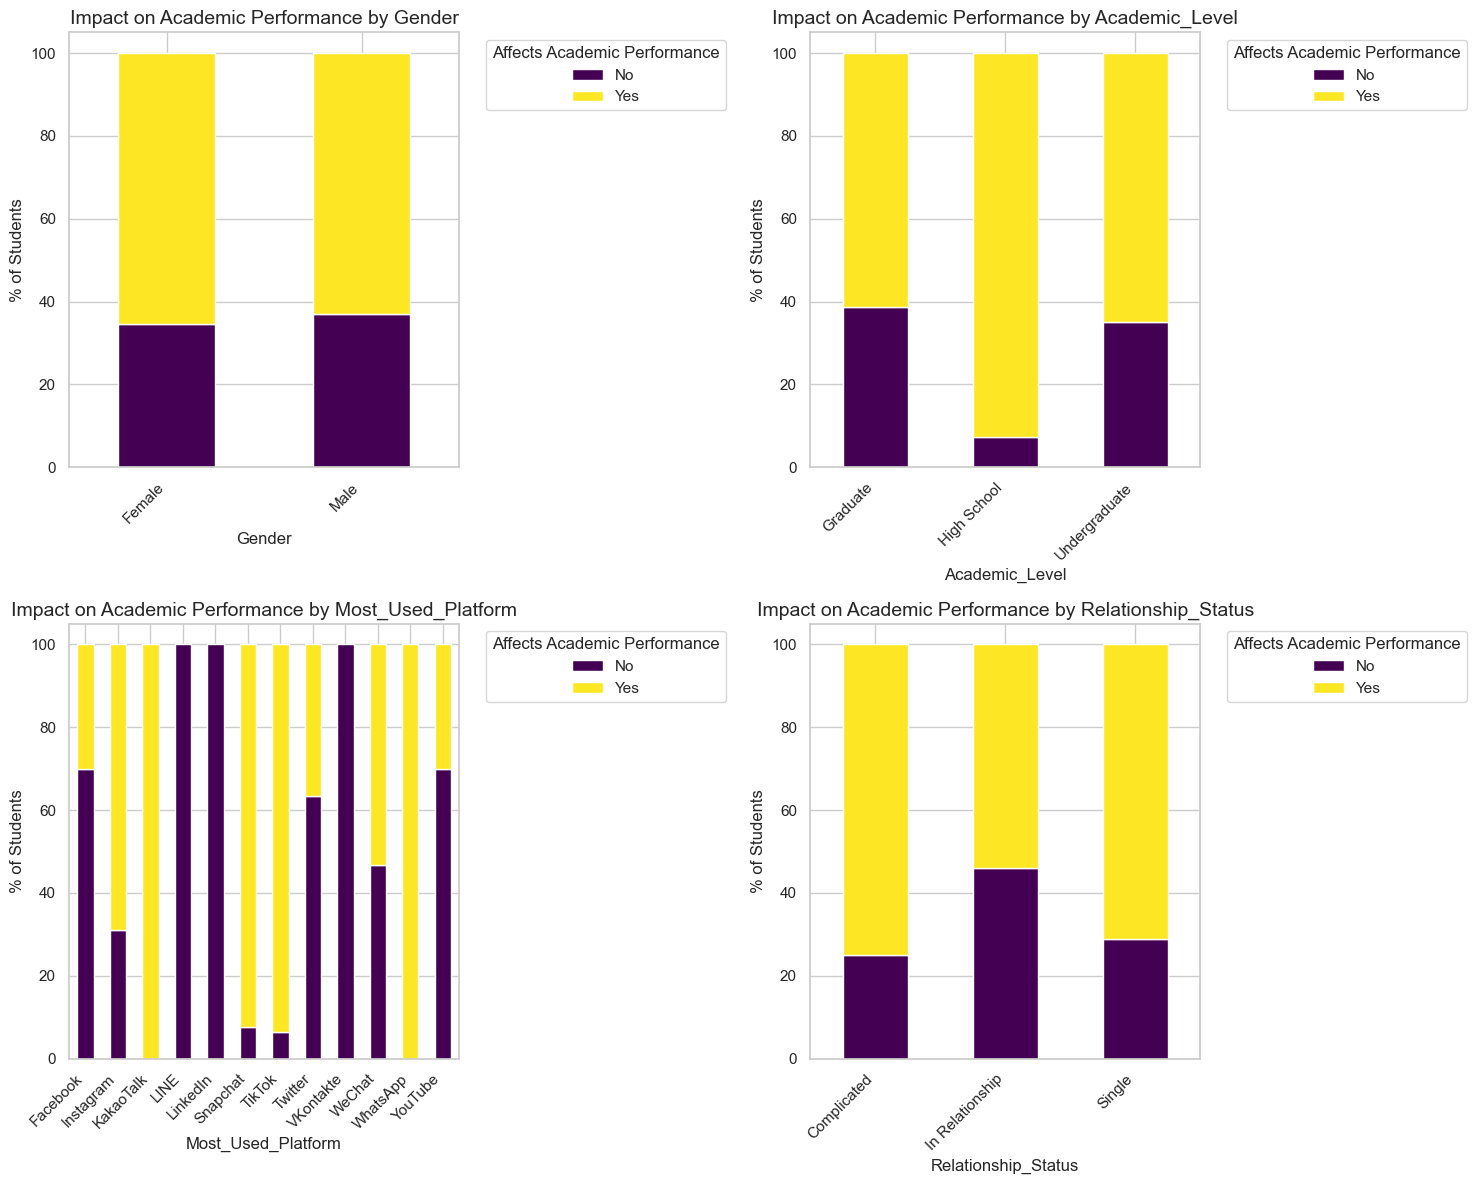

In [43]:
# List of categorical columns to analyze relationships between
categorical_cols_for_cat_rel = [
    'Gender',
    'Academic_Level',
    'Most_Used_Platform', # Including this as it's highly relevant to social media behavior
    'Relationship_Status' # Including this to see if relationship status is linked to academic impact
    # 'Country' is intentionally excluded from this plot type due to its high cardinality (110 unique values),
    # which would make the stacked bar chart unreadable. Its relationship can be explored through other methods if needed.
]

# Set up the matplotlib figure - adjusted for potentially more plots
# We'll calculate the number of rows and columns needed dynamically
num_plots = len(categorical_cols_for_cat_rel)
num_cols = 2 # Let's aim for 2 columns per row
num_rows = (num_plots + num_cols - 1) // num_cols # Ceiling division

plt.figure(figsize=(15, 6 * num_rows)) # Adjust figure size dynamically

# Loop through each categorical column and create a stacked bar chart with 'Affects_Academic_Performance'
for i, col in enumerate(categorical_cols_for_cat_rel):
    if col in df.columns and 'Affects_Academic_Performance' in df.columns:
        # Create a cross-tabulation (contingency table)
        cross_tab = pd.crosstab(df[col], df['Affects_Academic_Performance'], normalize='index') * 100

        plt.subplot(num_rows, num_cols, i + 1) # Arrange plots dynamically
        cross_tab.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='viridis')
        plt.title(f'Impact on Academic Performance by {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('% of Students', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Affects Academic Performance', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        print(f"Warning: One or both columns ('{col}', 'Affects_Academic_Performance') not found for plotting.")

plt.tight_layout()
plt.show()

### 2.10. Interpretation of Relationships: Categorical Variables

This section explores how different categorical factors are related to each other, especially focusing on their association with `Affects_Academic_Performance`.

**1. Impact on Academic Performance by Gender:**
* The actual percentages reveal a **very similar distribution** between genders regarding the perceived impact of social media on academic performance.
* Approximately **65% of female students** and **63% of male students** report that social media affects their academic performance.
* Similarly, about **35% of female students** and **37% of male students** report no impact.
* This indicates that, based on this dataset, **there is virtually no significant difference between male and female students in their perception of whether social media affects their academic performance.** Both genders show a majority believing it does have an impact.

**In summary:** Gender does not appear to be a significant factor in how students perceive the academic impact of social media in this dataset, as the proportions of 'Yes' and 'No' responses are very similar for both male and female students.

---

**2. Impact on Academic Performance by Academic_Level:**
* There's a **profound difference** in the perception of academic impact, especially concerning High School students.
* **High School students stand out significantly**: an overwhelming **94%** of them report that social media affects their academic performance. This is dramatically higher than both Graduate (62%) and Undergraduate (65%) students.
* Graduate and Undergraduate students show a similar pattern, with around 62-65% reporting an impact and 35-38% reporting no impact.
* This strong disparity suggests that **High School students are far more likely to feel that social media negatively interferes with their studies**, aligning with our previous observation that this group also has generally higher `Addicted_Score` values.

**In summary:** Academic level is a very strong determinant of perceived academic impact. High School students are much more likely to report that social media affects their academic performance, suggesting they are either more susceptible to its negative effects on studies or more aware of them.

---

**3. Impact on Academic Performance by Most_Used_Platform:**
* **Platforms with Very High Perceived Academic Impact (High 'Yes' Percentage):**
    * **TikTok (94% Yes)**, **Snapchat (93% Yes)**, **Instagram (69% Yes)** are platforms where a large majority of users feel social media affects their academic performance. These are often visual, highly engaging, and can lead to extended usage.
    * **WhatsApp (100% Yes)** stands out with a 100% perceived impact, and given its sample size of 54, this finding is more robust than for other 100% impact platforms like KakaoTalk (100% Yes, 12 users). This suggests a unique and strong perceived negative impact for WhatsApp users in this study.

* **Platforms with Low Perceived Academic Impact (High 'No' Percentage):**
    * **Facebook (69% No)**, **Twitter (63% No)**, **YouTube (69% No)** are platforms where a majority of users report *no* academic impact. These trends are more robust due to larger user bases. These platforms might be perceived as less intrusive or used differently.
    * **LinkedIn (100% No, 21 users)**, **LINE (100% No, 12 users)**, and **VKontakte (100% No, 12 users)** also show 100% no impact, aligning with their more specialized or limited usage patterns, though conclusions for these should be made with strong caution due to very small sample sizes.

* **Key Takeaway:** There's a **strong differentiation by platform type** regarding perceived academic impact. Platforms with short, highly engaging content (TikTok, Snapchat, Instagram) consistently show high perceived negative impact. The finding for WhatsApp is particularly noteworthy, indicating that despite being primarily a messaging app, its users in this dataset report a very high academic impact.

**In summary:** The specific social media platform a student uses most frequently correlates significantly with their perception of social media's impact on academic performance. Platforms known for highly engaging and potentially time-consuming content (TikTok, Snapchat, Instagram) are associated with a greater perceived negative impact. The high perceived impact among WhatsApp users is a significant observation.

---

**4. Impact on Academic Performance by Relationship_Status:**
* **Students who are "In Relationship"** show a notably different perception compared to "Single" and "Complicated" students. A higher proportion of students "In Relationship" (46% No) believe social media does *not* affect their academic performance, compared to "Single" (29% No) and "Complicated" (24% No) students.
* Conversely, students who are **"Complicated" (76% Yes)** and **"Single" (71% Yes)** are more likely to report that social media *does* affect their academic performance.
* This suggests that **students in an established, possibly more stable, relationship might be less likely to perceive social media as a hindrance to their academic performance**, or perhaps manage their social media use differently, leading to less perceived interference. The finding for "Complicated" is consistent with this, as such relationships might involve more social media interaction or emotional stress, leading to a higher perceived impact.

**In summary:** Relationship status appears to have some association with the perceived impact of social media on academic performance. Students who are "In Relationship" are notably less likely to report a negative academic impact compared to "Single" or "Complicated" students. While the "Complicated" group is small, its high perceived impact aligns with the hypothesis that more stable relationships might correlate with less perceived academic interference from social media.

## 3. Conclusion and Recommendations
### 3.1. Answers to Research Questions:
* **Question 1: Is there a link between time spent on social media and how addicted students feel?**
    * **Answer:** Yes, there is a **very strong link**. Students who spend **more time daily on social media (median almost 5 hours)** report significantly higher levels of social media addiction. This is shown by a strong positive correlation (0.82) between daily usage hours and addiction scores.
---
* **Question 2: How does social media addiction affect sleep and mental health? (Do more addicted students sleep less or have worse mental health?)**
    * **Answer:** Yes, social media addiction is strongly linked to both sleep and mental health. There is an **extremely strong negative correlation (-0.95)** between `Addicted_Score` and `Mental_Health_Score`, meaning higher addiction levels are associated with significantly worse mental health. Additionally, a **strong negative correlation (-0.76)** exists between `Addicted_Score` and `Sleep_Hours_Per_Night`, indicating that more addicted students tend to sleep fewer hours. It's also important to note a **strong positive correlation (0.71)** between `Sleep_Hours_Per_Night` and `Mental_Health_Score`, suggesting that adequate sleep is linked to better mental well-being.
---
* **Question 3: Is there a difference in social media addiction between male and female students?**
    * **Answer:** While both genders show a wide range of addiction, there is **only a slight difference**: female students might have slightly higher average addiction levels. However, the overall addiction patterns and the perceived impact on academic performance are very similar for both male and female students in this dataset.
---
* **Question 4: Does social media addiction affect academic performance?**
    * **Answer:** Yes, social media addiction **strongly affects academic performance**. Students who feel social media negatively impacts their studies consistently show **much higher addiction scores**. This highlights a clear connection between higher addiction and a negative effect on grades and study habits. This impact is especially high among high school students (94% report impact).
---
* **Question 5: What are the main factors related to social media addiction?**
    * **Answer:** Key factors linked to social media addiction and its impact are:
        * **High Daily Usage:** More time spent online leads to higher addiction.
        * **Negative Impact on Mental Health:** Higher addiction strongly correlates with worse mental well-being.
        * **More Conflicts:** Increased social media-related arguments are strongly linked to higher addiction.
        * **Less Sleep:** Higher addiction is associated with reduced sleep hours.
        * **Academic Level:** **High school students are particularly vulnerable**, showing higher addiction scores and a strong belief that social media affects their studies.
        * **Platform Choice:** Highly engaging platforms like **Instagram, TikTok, WhatsApp, and Snapchat** are linked to higher addiction and greater negative academic impact, while professional platforms (e.g., LinkedIn) show lower impact.

### 3.2. Overall Project Conclusions:

This exploratory data analysis reveals that **social media addiction is a significant and prevalent issue** among the young adult student population in our dataset. Our findings clearly show that students spend a considerable amount of time on social media daily, with a high median addiction score, indicating that for many, social media engagement has become problematic.

A critical finding is the **strong negative impact of higher social media addiction on students' mental health and sleep patterns**. More addicted students tend to report worse mental well-being and get fewer hours of sleep, suggesting a concerning link between digital habits and overall well-being. Furthermore, conflicts arising from social media use are also strongly associated with higher addiction levels.

The analysis also highlighted **specific demographic groups and platform types that are particularly vulnerable**. High school students, despite being a smaller group in our dataset, consistently exhibit higher addiction scores and a much stronger perception that social media negatively affects their academic performance. This suggests that younger students might require more targeted support. Additionally, certain highly engaging platforms like Instagram, TikTok, WhatsApp, and Snapchat are linked to higher addiction levels and perceived negative academic impacts, contrasting with more professional platforms.

In summary, the data strongly supports the idea that **uncontrolled social media use can lead to addiction with tangible negative consequences** for students' academic success, mental state, and physical health. Recognizing these patterns is the first step towards developing strategies for healthier digital habits.

### 3.3. Recommendations:

Based on our findings, we propose the following recommendations to address social media addiction among students and its negative impacts:

* **For Educational Institutions (Schools and Universities):**
    * **Implement Digital Literacy Programs:** Introduce workshops or courses that teach students about responsible social media use, recognizing addiction signs, and managing screen time. These programs should be especially focused on high school students, given their higher vulnerability.
    * **Provide Mental Health Support:** Offer accessible counseling services and mental health resources, particularly focusing on the link between social media use, stress, anxiety, and sleep issues.
    * **Promote Healthy Habits:** Encourage offline activities, study groups, and extracurriculars that reduce reliance on social media for social interaction.
    * **Raise Awareness:** Regularly share information with students and parents about the potential negative effects of excessive social media use on academic performance, mental health, and sleep.
---
* **For Students:**
    * **Monitor Screen Time:** Encourage students to use built-in phone features or apps to track their daily social media usage and set limits.
    * **Practice Digital Detox:** Suggest regular breaks from social media, such as designated "no-phone" hours or days, especially before sleep.
    * **Choose Platforms Wisely:** Be aware that certain platforms (like TikTok, Instagram, WhatsApp, Snapchat) are associated with higher addiction risks and manage their use accordingly.
    * **Seek Support:** Encourage students to talk to a trusted adult, counselor, or friend if they feel overwhelmed or addicted to social media.
---
* **For Social Media Platforms (Long-term consideration):**
    * **Integrate Wellness Features:** Consider adding more prominent features that help users monitor and manage their usage, such as gentle reminders to take breaks or personalized usage reports.
    * **Promote Positive Interactions:** Focus on features that encourage positive social connections and limit addictive design elements.

### 3.4. Limitations and Future Work:

**Limitations of This Analysis:**
While this analysis provides valuable insights, it's important to acknowledge its limitations:
* **Self-Reported Data:** The data relies on students' own answers, which might not always be perfectly accurate or objective.
* **Correlational, Not Causal:** Our analysis shows relationships (correlations) between variables, but it cannot prove that one factor directly *causes* another (e.g., higher social media use causes worse mental health).
* **Snapshot in Time:** This study captures data at a single point in time. It doesn't show how students' habits or addiction levels change over time.
* **Sample Specifics:** While diverse, the dataset has an imbalanced representation of countries, and conclusions for countries or platforms with very few users should be made with caution.
---
**Future Work and Research Directions:**
To build upon these findings, future research could consider:
* **Longitudinal Studies:** Following the same group of students over time to understand how social media use and addiction evolve and impact long-term outcomes.
* **Broader Demographics:** Expanding the study to include a wider age range, different educational settings, or more balanced representation from various countries.
* **Qualitative Research:** Conducting interviews or focus groups to gain deeper insights into students' personal experiences and perceptions of social media.
* **Intervention Effectiveness:** Designing and testing educational programs or digital well-being tools to see if they can effectively reduce social media addiction and improve student well-being.
* **Predictive Modeling:** Using machine learning to identify students at high risk of social media addiction based on various characteristics.

In [50]:
df.to_csv('../data/students_social_media_addiction_clean.csv', index=False)  # save the cleaned dataset for visualization in Power BI